## Importing the Dependencies

In [65]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import QuantileTransformer

import warnings
warnings.filterwarnings(action='ignore', category=DeprecationWarning)
warnings.filterwarnings(action='ignore', category=FutureWarning)
warnings.filterwarnings(action='ignore', category=UserWarning)

%config InlineBackend.figure_format = 'retina'

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

## Loading the Dataset

In [3]:
df = pd.read_csv('diabetes.csv')

## Exploratory Data Analysis

### Taking a look at the dataset

In [6]:
df.shape

(768, 9)

In [7]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.60,0.63,50,1
1,1,85,66,29,0,26.60,0.35,31,0
2,8,183,64,0,0,23.30,0.67,32,1
3,1,89,66,23,94,28.10,0.17,21,0
4,0,137,40,35,168,43.10,2.29,33,1


In [8]:
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.90,0.17,63,0
764,2,122,70,27,0,36.80,0.34,27,0
765,5,121,72,23,112,26.20,0.24,30,0
766,1,126,60,0,0,30.10,0.35,47,1
767,1,93,70,31,0,30.40,0.32,23,0


In [10]:
df.sample(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
490,2,83,65,28,66,36.80,0.63,24,0
530,2,122,60,18,106,29.80,0.72,22,0
501,3,84,72,32,0,37.20,0.27,28,0
312,2,155,74,17,96,26.60,0.43,27,1
744,13,153,88,37,140,40.60,1.17,39,0


In [11]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

'DiabetesPedigreeFunction' is too long a name

In [12]:
df.rename(columns={'DiabetesPedigreeFunction': 'DPF'}, inplace=True)

In [13]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DPF,Age,Outcome
0,6,148,72,35,0,33.60,0.63,50,1
1,1,85,66,29,0,26.60,0.35,31,0
2,8,183,64,0,0,23.30,0.67,32,1
3,1,89,66,23,94,28.10,0.17,21,0
4,0,137,40,35,168,43.10,2.29,33,1


### Getting Statistical Measures

In [16]:
df.drop(columns=['Outcome']).describe([0.1, 0.25, 0.5, 0.75, 0.9, 0.95, 0.99]) # describe the categorical target variabel is meaningless

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DPF,Age
count,768.00,768.00,768.00,768.00,768.00,768.00,768.00,768.00
mean,3.85,120.89,69.11,20.54,79.80,31.99,0.47,33.24
std,3.37,31.97,19.36,15.95,115.24,7.88,0.33,11.76
min,0.00,0.00,0.00,0.00,0.00,0.00,0.08,21.00
10%,0.00,85.00,54.00,0.00,0.00,23.60,0.17,22.00
25%,1.00,99.00,62.00,0.00,0.00,27.30,0.24,24.00
50%,3.00,117.00,72.00,23.00,30.50,32.00,0.37,29.00
75%,6.00,140.25,80.00,32.00,127.25,36.60,0.63,41.00
90%,9.00,167.00,88.00,40.00,210.00,41.50,0.88,51.00
95%,10.00,181.00,90.00,44.00,293.00,44.39,1.13,58.00


### Dealing with Missing Values

In [17]:
df.isnull().sum()

Pregnancies      0
Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
DPF              0
Age              0
Outcome          0
dtype: int64

In [18]:
import missingno

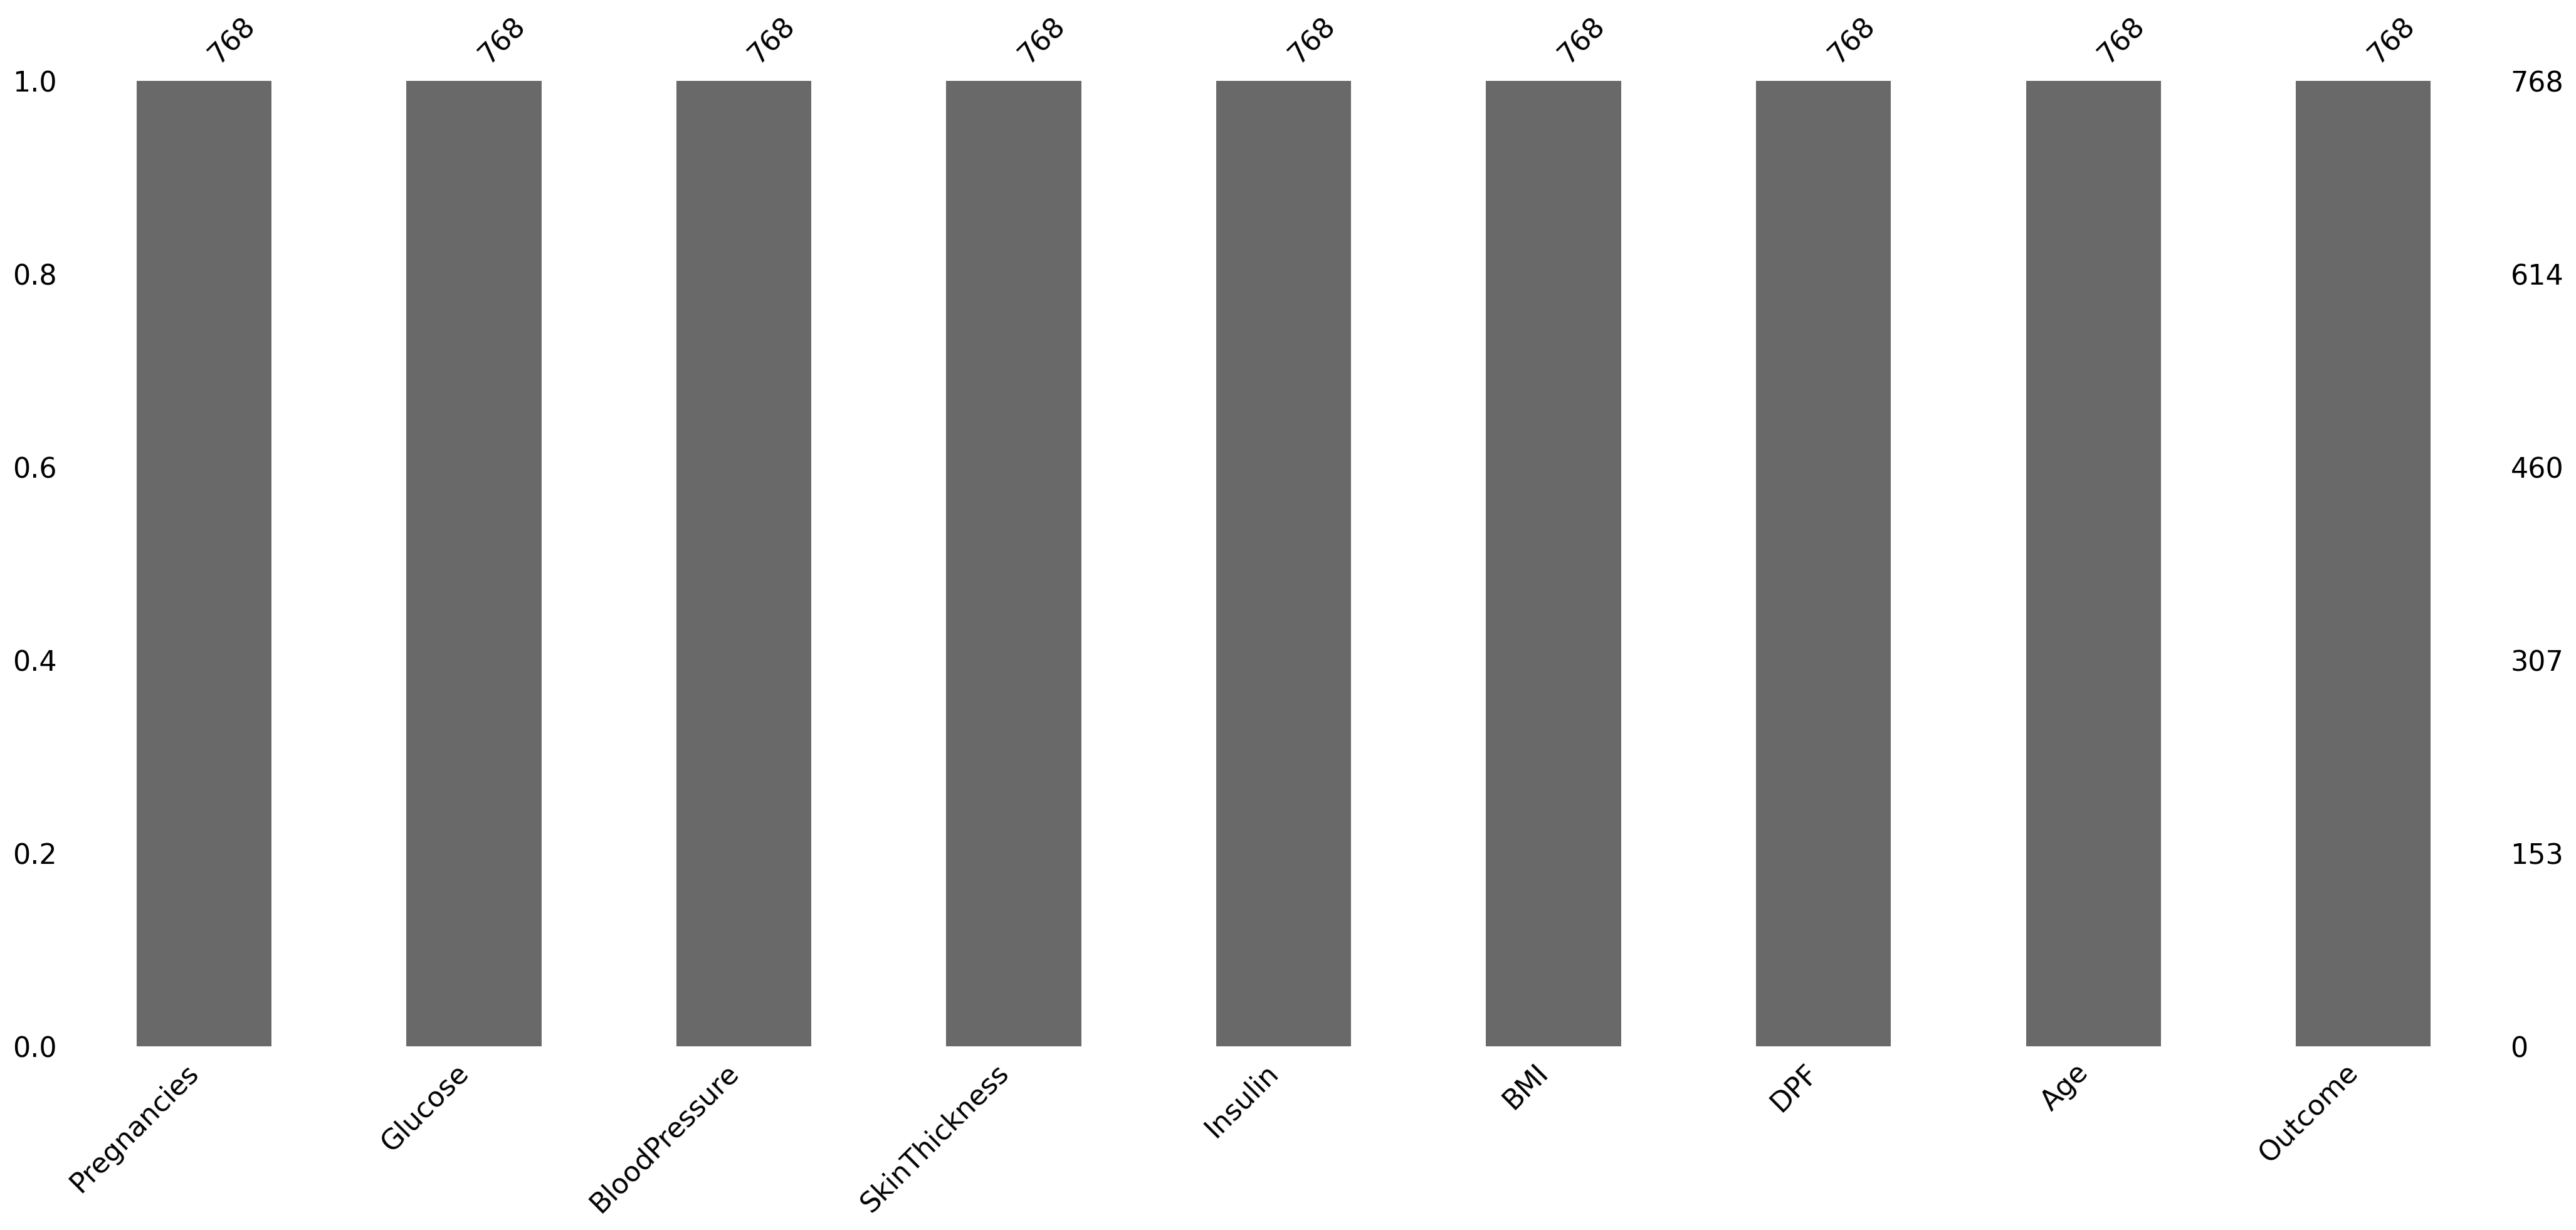

In [22]:
missingno.bar(df)
plt.show()

### Checking Target Imbalance

In [23]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [24]:
df['Outcome'].value_counts() / len(df) * 100

0   65.10
1   34.90
Name: Outcome, dtype: float64

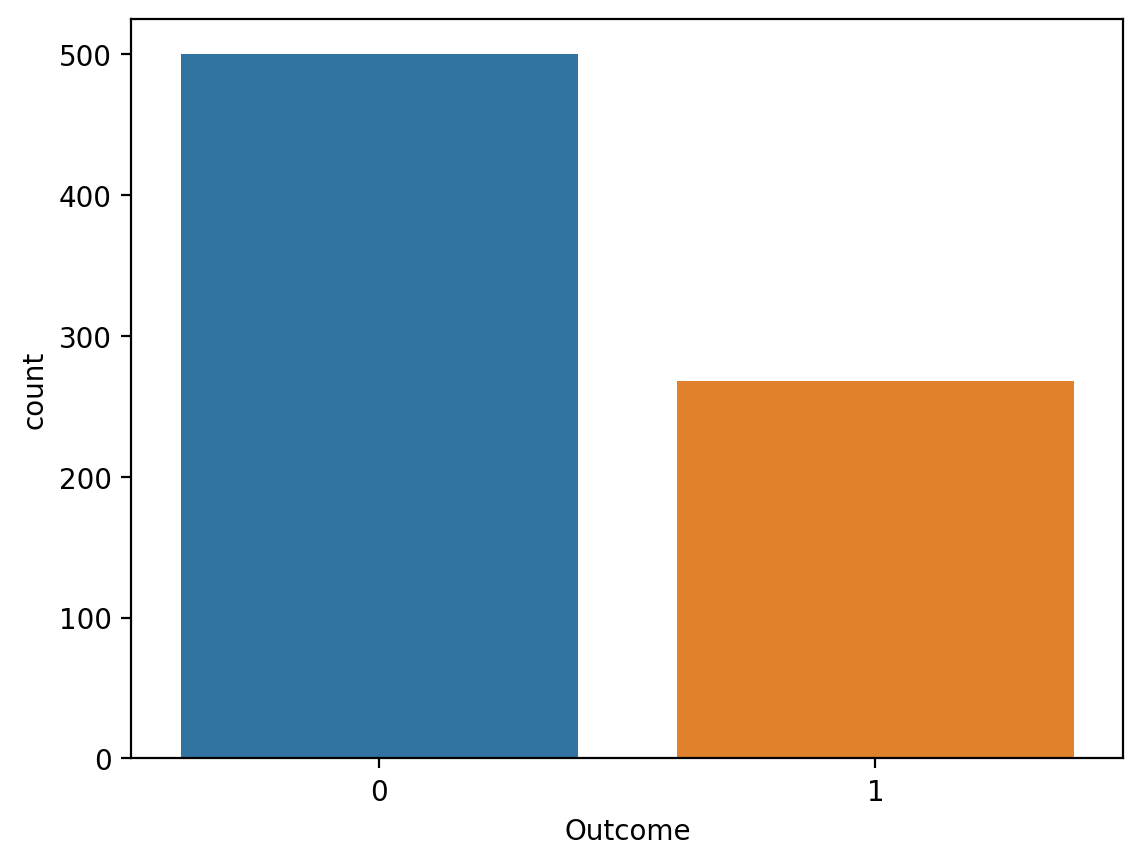

In [25]:
sns.countplot(x='Outcome', data=df)
plt.show()

In [30]:
for count in df['Outcome'].value_counts():
    print(count)

500
268


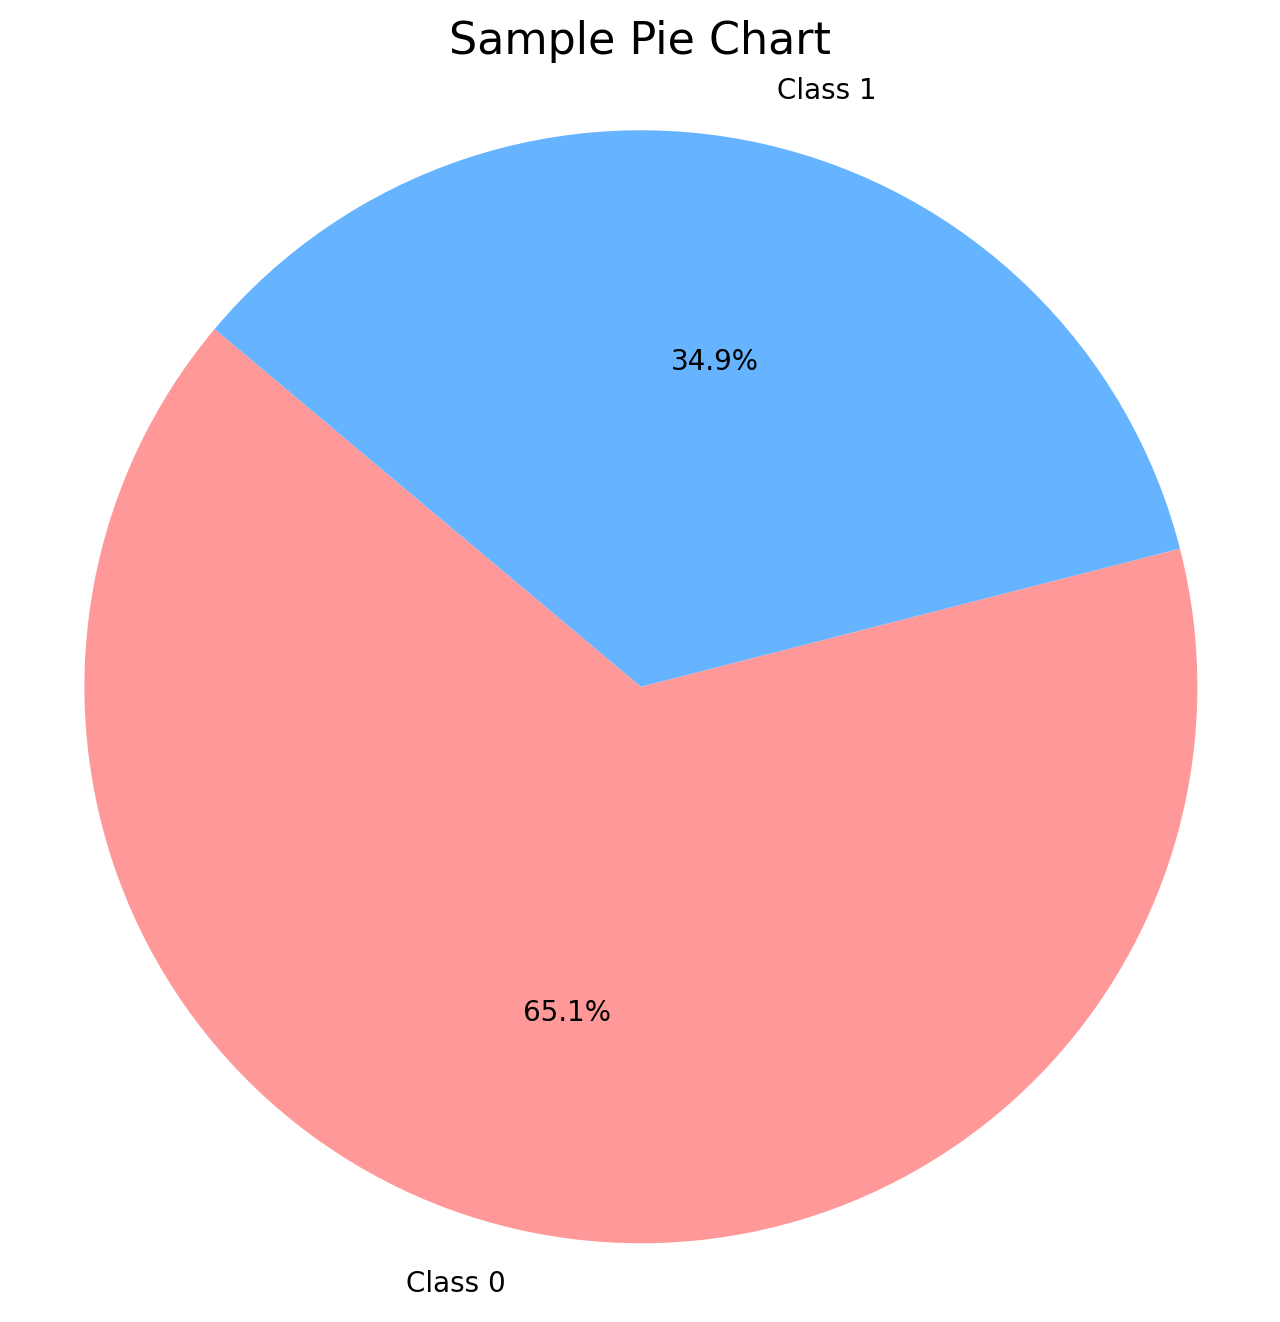

In [33]:
categories = ['Class 0', 'Class 1']
values = [count for count in df['Outcome'].value_counts()]

colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99']

plt.figure(figsize=(8, 8))  
plt.pie(values, labels=categories, colors=colors, autopct='%1.1f%%', startangle=140)

plt.title('Sample Pie Chart', fontsize=16)
plt.axis('equal')

plt.show()

The target is well-balanced

### Dealing with Unnatural Zero-values

In [38]:
for feature in df.drop(columns=['Outcome']):
    print("{} has {} ({:.2f}%) 0-values".format(feature, (df[feature] == 0).sum(), (df[feature] == 0).sum() / len(df) * 100))

Pregnancies has 111 (14.45%) 0-values
Glucose has 5 (0.65%) 0-values
BloodPressure has 35 (4.56%) 0-values
SkinThickness has 227 (29.56%) 0-values
Insulin has 374 (48.70%) 0-values
BMI has 11 (1.43%) 0-values
DPF has 0 (0.00%) 0-values
Age has 0 (0.00%) 0-values


0-values for 'Pregnancies' are not out of the place

In [39]:
zero_values = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df[zero_values] = df[zero_values].replace(0, df[zero_values].mean())

In [41]:
df.drop(columns='Outcome').describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DPF,Age
count,768.00,768.00,768.00,768.00,768.00,768.00,768.00,768.00
mean,3.85,121.68,72.25,26.61,118.66,32.45,0.47,33.24
std,3.37,30.44,12.12,9.63,93.08,6.88,0.33,11.76
min,0.00,44.00,24.00,7.00,14.00,18.20,0.08,21.00
25%,1.00,99.75,64.00,20.54,79.80,27.50,0.24,24.00
50%,3.00,117.00,72.00,23.00,79.80,32.00,0.37,29.00
75%,6.00,140.25,80.00,32.00,127.25,36.60,0.63,41.00
max,17.00,199.00,122.00,99.00,846.00,67.10,2.42,81.00


### Removing Outliers

In [42]:
q1 = df.quantile(0.25)
q3 = df.quantile(0.75)
iqr = q3 - q1
iqr_range = 1.5

# Create a boolean mask to identify rows with outliers in any columns
outliers_mask = ((df < q1 - iqr_range * iqr) | (df > q3 + iqr_range * iqr))

df = df[~outliers_mask]

## Splitting the Features and the Label

In [47]:
X = df.drop(columns=['Outcome'])
y = df['Outcome']

## Splitting the Dataset into Training set and Test set

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=0)

## Feature Scaling

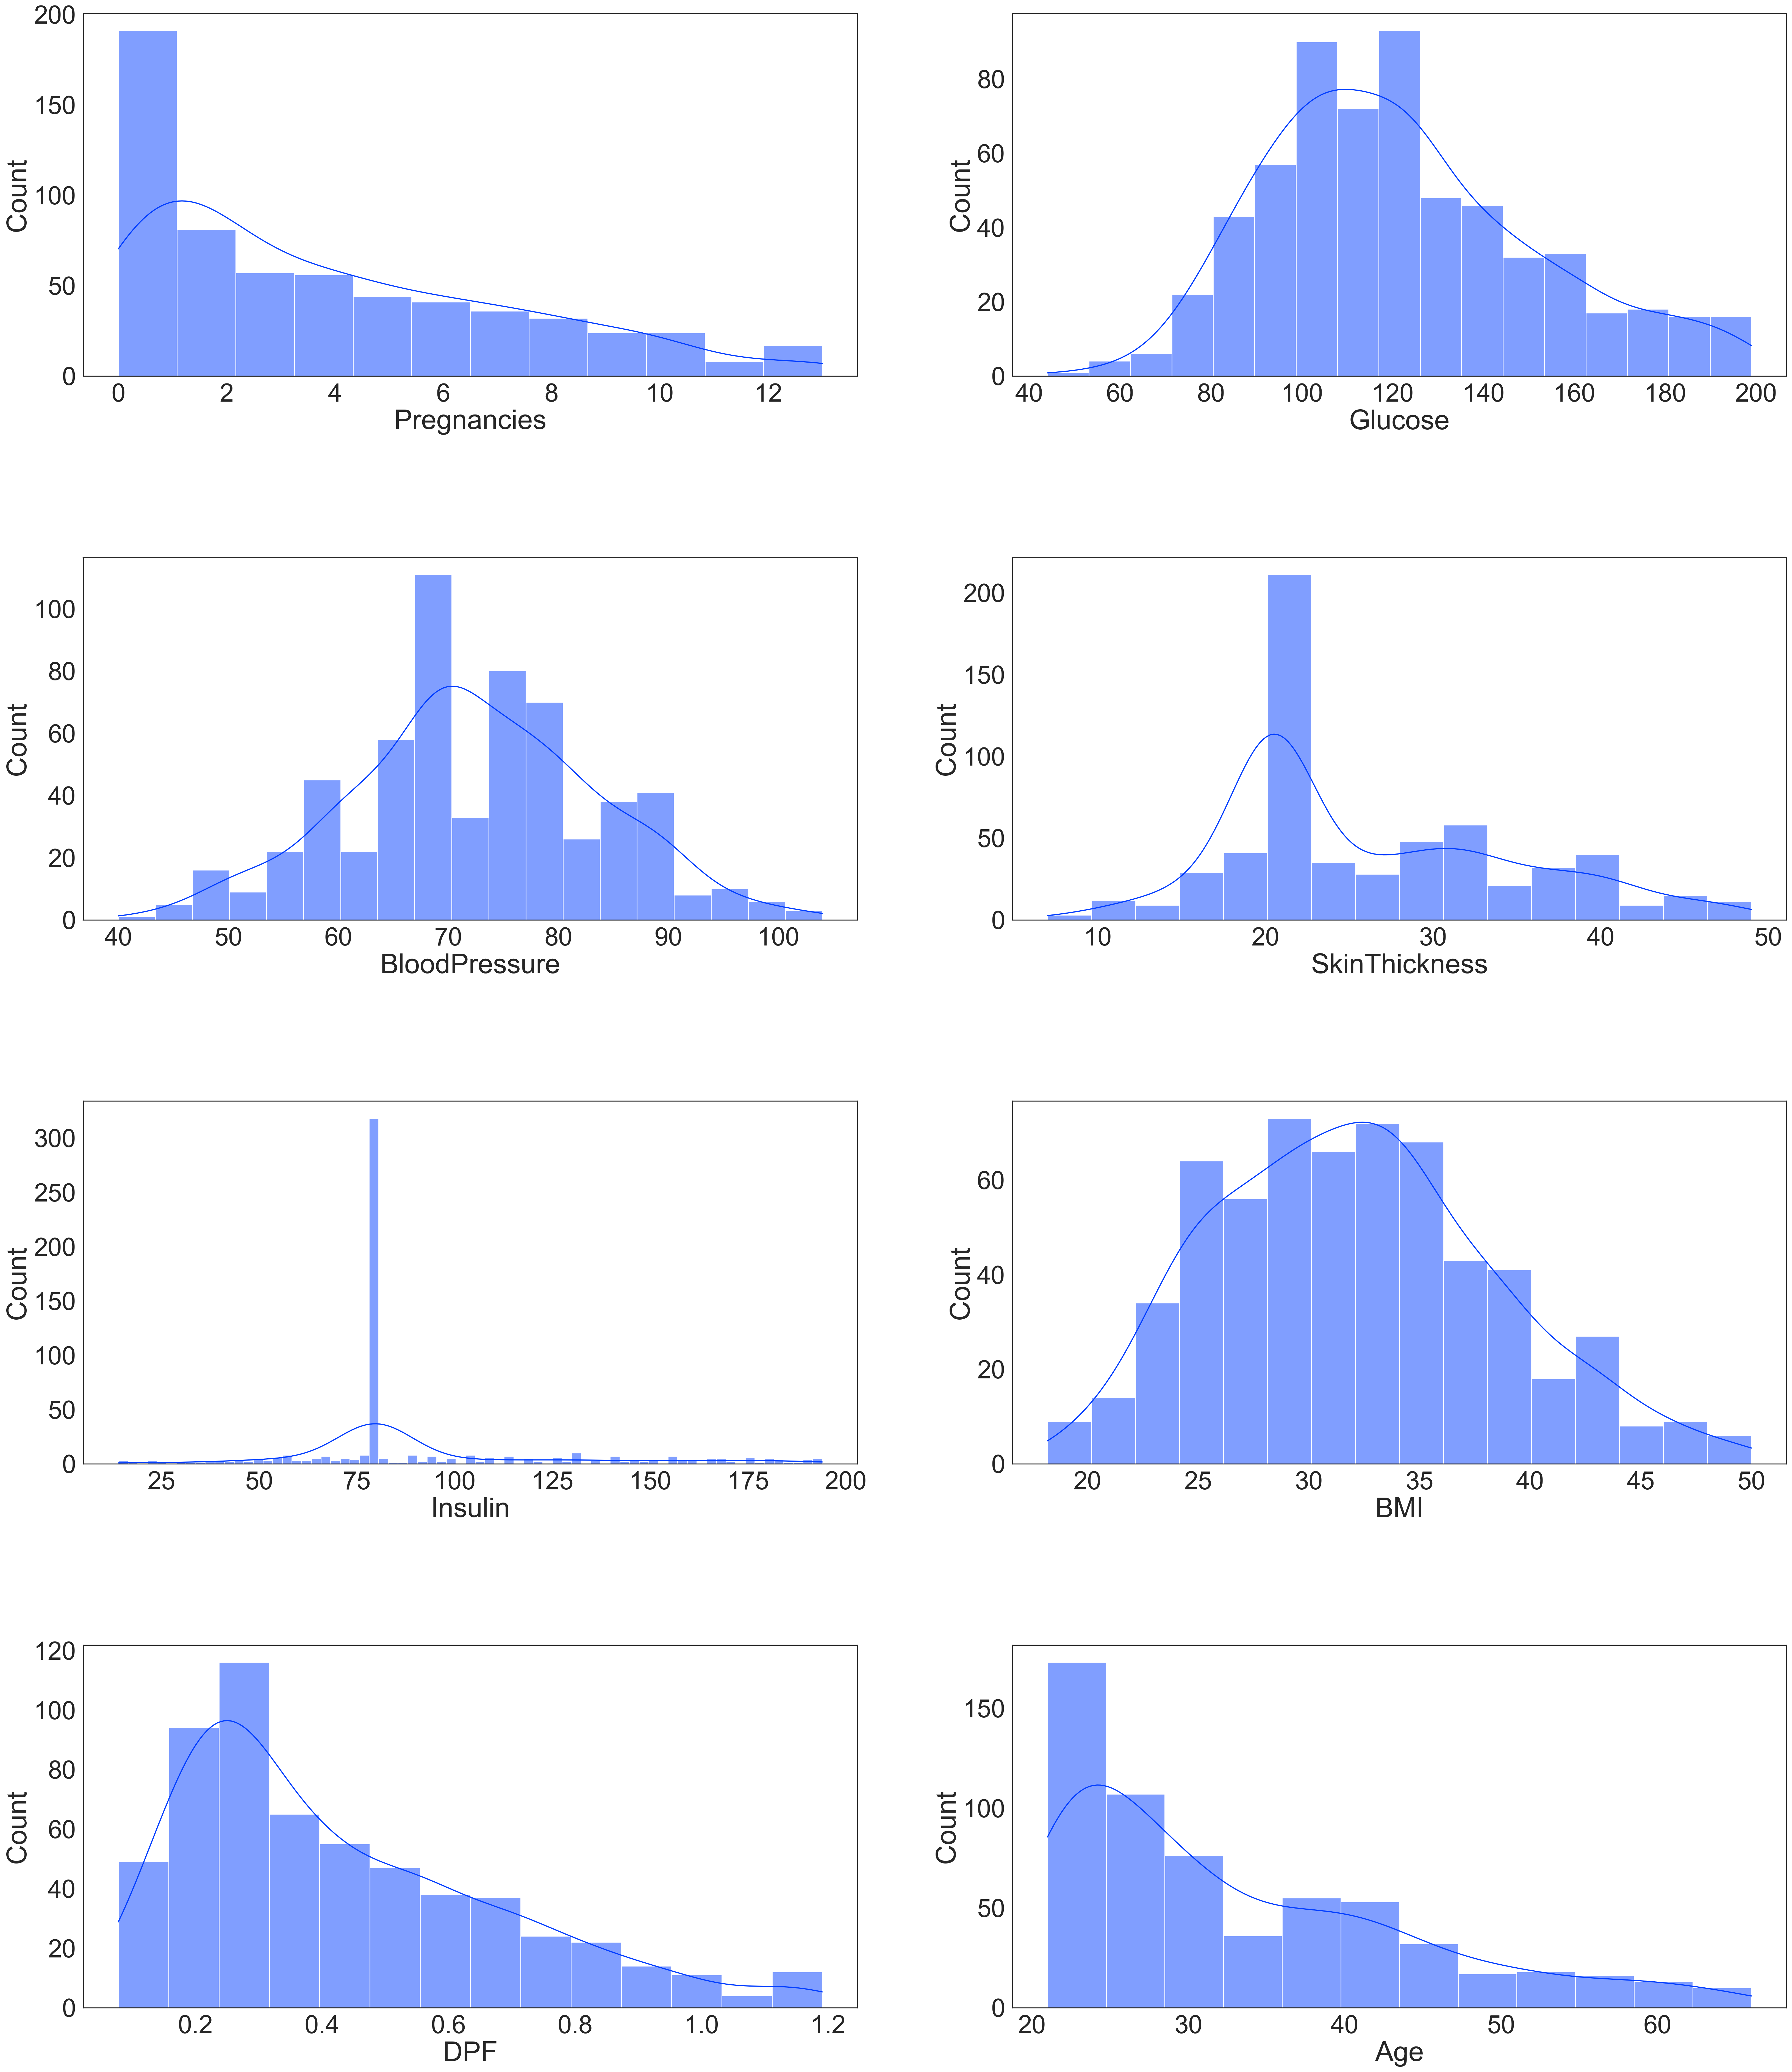

In [60]:
rcParams['figure.figsize'] = 40, 60
sns.set(font_scale=3)
sns.set_style('white')
sns.set_palette('bright')
plt.subplots_adjust(hspace=0.5)
i = 1
for feature in X_train.columns:
    plt.subplot(5, 2, i)
    sns.histplot(data=X_train, x=feature, kde=True, palette='YlGnBu')
    i += 1

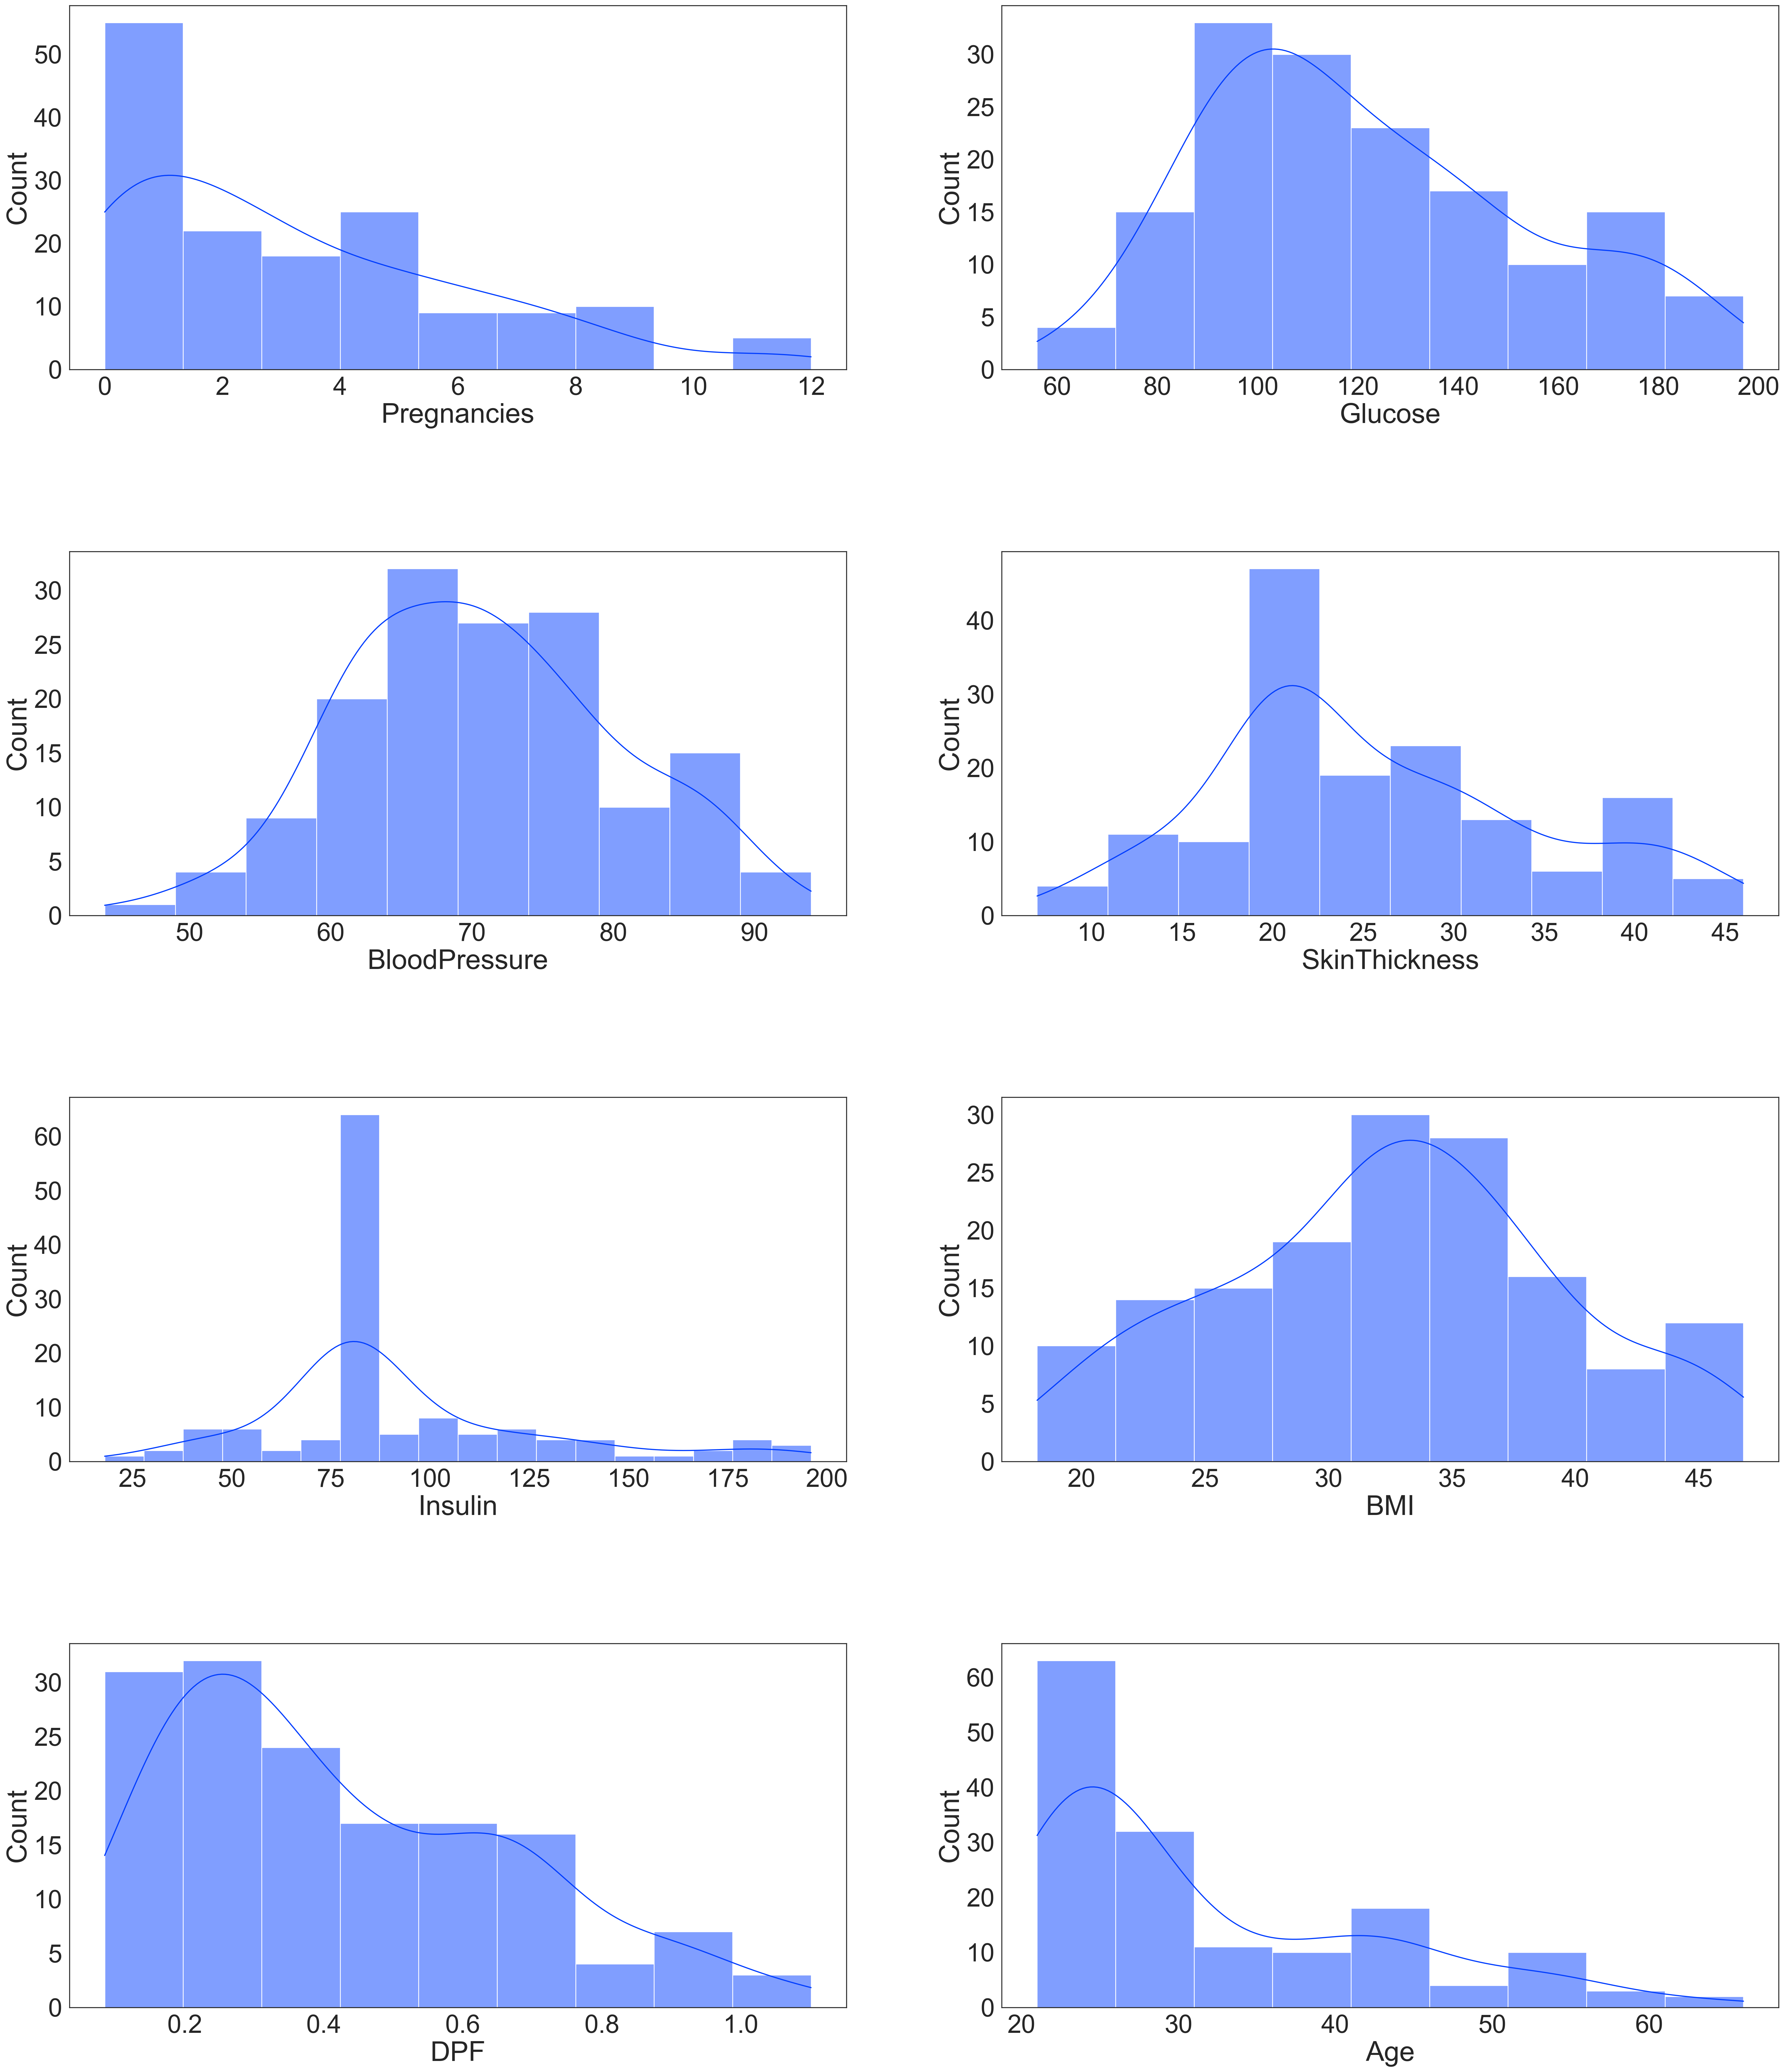

In [63]:
rcParams['figure.figsize'] = 40, 60
sns.set(font_scale=3)
sns.set_style('white')
sns.set_palette('bright')
plt.subplots_adjust(hspace=0.5)
i = 1
for feature in X_test.columns:
    plt.subplot(5, 2, i)
    sns.histplot(data=X_test, x=feature, kde=True, palette='YlGnBu')
    i += 1

In [66]:
scaler = QuantileTransformer(n_quantiles=100, output_distribution='normal', random_state=0)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [68]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

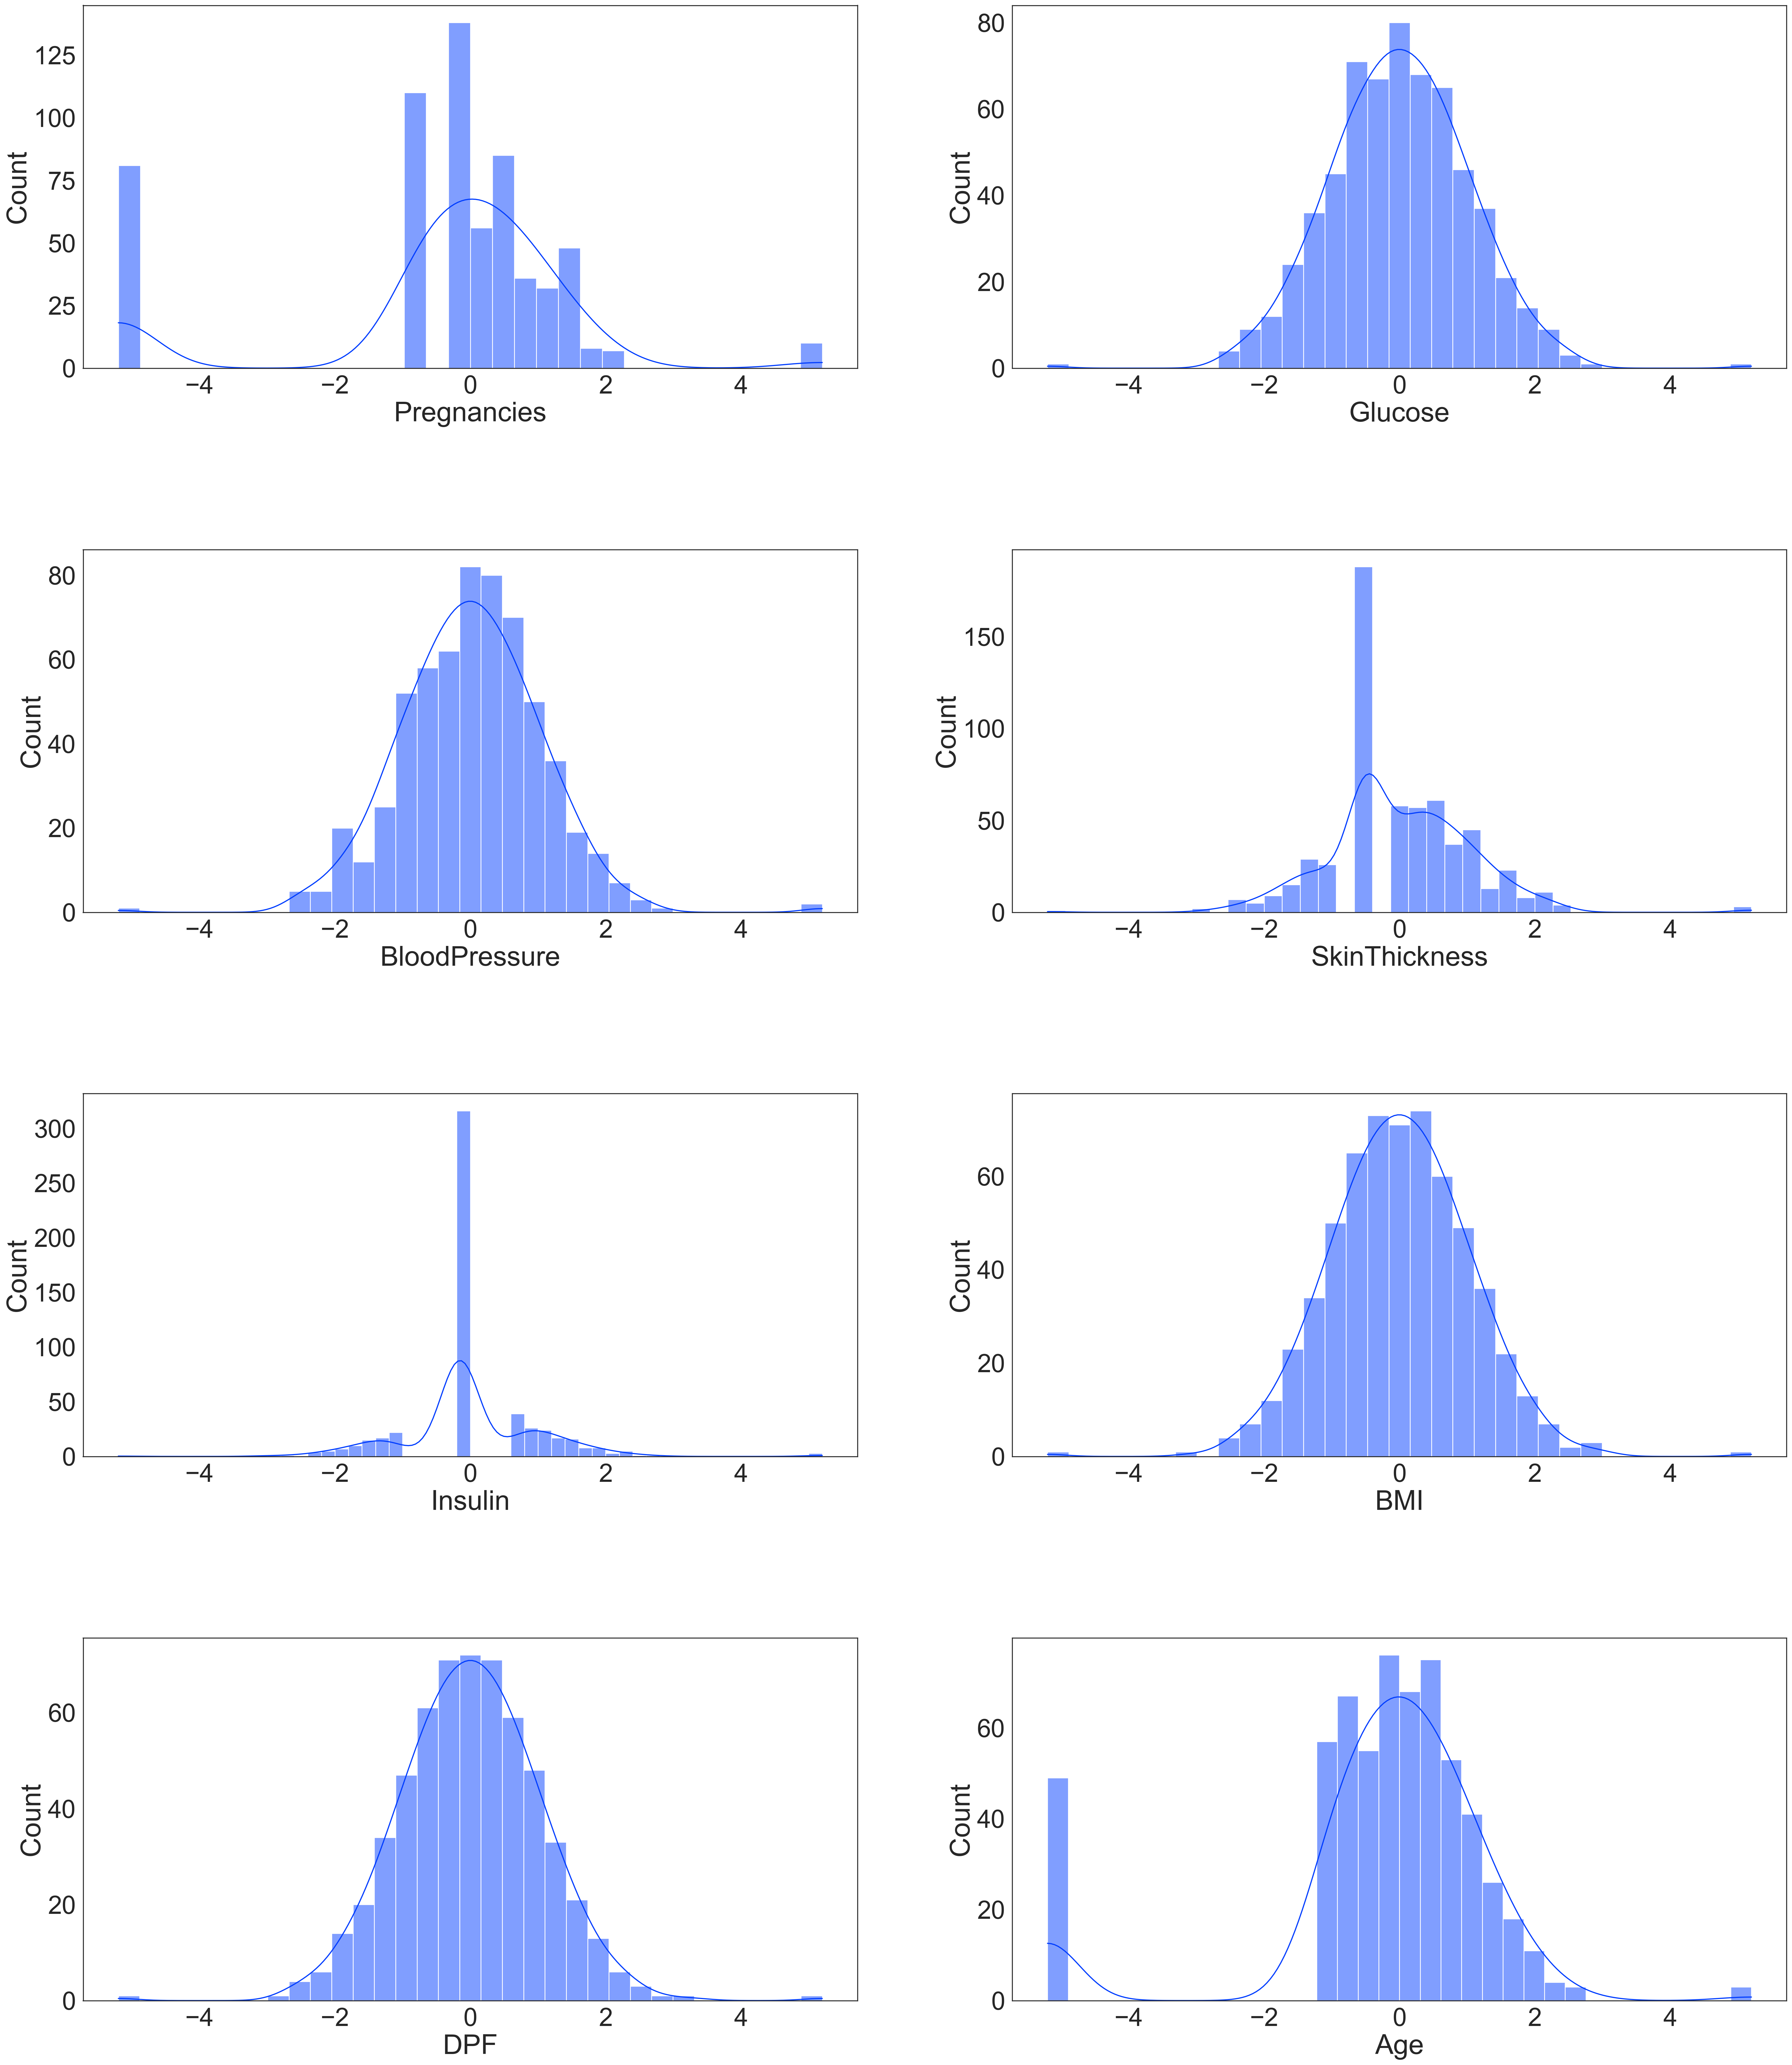

In [69]:
rcParams['figure.figsize'] = 40, 60
sns.set(font_scale=3)
sns.set_style('white')
sns.set_palette('bright')
plt.subplots_adjust(hspace=0.5)
i = 1
for feature in X_train_scaled.columns:
    plt.subplot(5, 2, i)
    sns.histplot(data=X_train_scaled, x=feature, kde=True, palette='YlGnBu')
    i += 1